<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [49]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.998734,-1.00,-0.159091,-1.0,-0.226337,0.161908,0.363543,-0.754658,-1.000000,-0.671756,0.787234,0.975238,-0.561810,-0.226667
502,-0.999124,-1.00,-0.159091,-1.0,-0.226337,-0.019352,0.520082,-0.789413,-1.000000,-0.671756,0.787234,1.000000,-0.594371,-0.306667
503,-0.998776,-1.00,-0.159091,-1.0,-0.226337,0.308680,0.814624,-0.811238,-1.000000,-0.671756,0.787234,1.000000,-0.784216,-0.160000
504,-0.997679,-1.00,-0.159091,-1.0,-0.226337,0.238935,0.779609,-0.770972,-1.000000,-0.671756,0.787234,0.982601,-0.737859,-0.244444


In [4]:
# from sklearn import preprocessing
# headers = [x for x in data]
# data = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(data))
# data.columns = names
# data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.998734,-1.00,-0.159091,-1.0,-0.226337,0.161908,0.363543,-0.754658,-1.000000,-0.671756,0.787234,0.975238,-0.561810,-0.226667
502,-0.999124,-1.00,-0.159091,-1.0,-0.226337,-0.019352,0.520082,-0.789413,-1.000000,-0.671756,0.787234,1.000000,-0.594371,-0.306667
503,-0.998776,-1.00,-0.159091,-1.0,-0.226337,0.308680,0.814624,-0.811238,-1.000000,-0.671756,0.787234,1.000000,-0.784216,-0.160000
504,-0.997679,-1.00,-0.159091,-1.0,-0.226337,0.238935,0.779609,-0.770972,-1.000000,-0.671756,0.787234,0.982601,-0.737859,-0.244444


       name   norm lognorm   exp  gamma
0      CRIM  False   False  True  False
1        ZN  False   False  True  False
2     INDUS  False   False  True  False
3      CHAS  False   False  True  False
4       NOX  False   False  True   True
5        RM  False   False  True   True
6       AGE  False   False  True  False
7       DIS  False   False  True   True
8       RAD  False   False  True  False
9       TAX  False   False  True  False
10  PTRATIO  False   False  True  False
11        B  False   False  True  False
12    LSTAT  False    True  True   True
13     MEDV  False    True  True   True


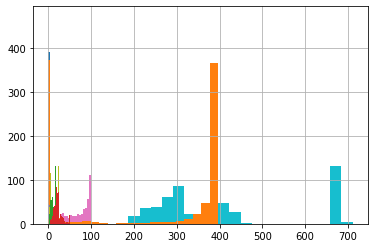

In [58]:
from statsmodels.stats.diagnostic import lilliefors




al = 0.00001
dist = stats.gamma

test_results = pd.DataFrame(columns = ['name','norm', 'lognorm','exp','gamma'])
# data2=pd.DataFrame()
for i in data:
    args = dist.fit(data[i])
    data[i] = data[i].dropna()  
#     data[i] = data[i] - data[i].mean()
#     data[i] = data[i] / data[i].min()
    test_results = test_results.append(
        {'name':i,
         'norm':stats.normaltest(data[i])[1] > al,
         'lognorm':stats.normaltest(np.log(data[i]))[1] > al,
         'exp':lilliefors(data[i], dist='exp')[1] > al,
         'gamma':stats.kstest(data[i], dist.cdf, args)[1] > al},
          ignore_index=True)
    
    data[i].hist(bins=20)
print(test_results)


CHAS - Бернулли,
RM - Нормальное,
AGE - Равномерное,
DIS - Логнормальное,
LSTAT - Биноминальное.

(тесты на распределение работают не оч..)

TAX


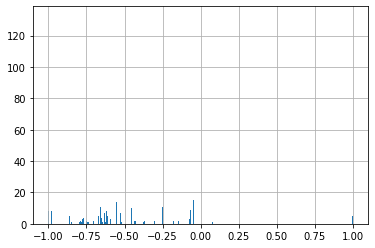

In [37]:
o = names[9]
print(o)
data[o].hist(bins=500)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [50]:
data['MEDV'].fillna(0, inplace = True)
data['LSTAT'].fillna(0, inplace = True)
# freedom = df['Freedom']
# positive = df['Positive affect']

MEDV = np.array(data['MEDV']).reshape(-1,1)
LSTAT = np.array(data['LSTAT']).reshape(-1,1)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    MEDV,
    LSTAT,
    test_size = 0.2,
    random_state = 3
)

model.fit(X_train, y_train)

predicted_y = model.predict(X_test)

model.score(X_test, y_test)

0.5663680841829949

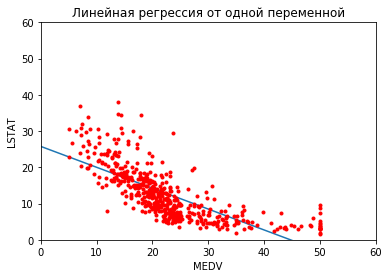

In [54]:
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(0, 60, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(MEDV, LSTAT, 'r.')
plt.xlim(0,60)
plt.ylim(0,60)
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [59]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [70]:
X = data.iloc[:,1:]
X

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...
151,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


In [75]:
np.round(np.cov(X), decimals=0)

array([[ 2.900e+02,  1.200e+02,  4.400e+01, ...,  1.250e+02, -8.800e+01,
        -1.780e+02],
       [ 1.200e+02,  9.100e+01,  6.100e+01, ..., -2.900e+01, -1.200e+01,
         6.000e+00],
       [ 4.400e+01,  6.100e+01,  6.300e+01, ..., -1.000e+01,  9.000e+00,
        -1.000e+00],
       ...,
       [ 1.250e+02, -2.900e+01, -1.000e+01, ...,  1.480e+03,  2.940e+02,
        -3.000e+00],
       [-8.800e+01, -1.200e+01,  9.000e+00, ...,  2.940e+02,  2.810e+02,
         3.660e+02],
       [-1.780e+02,  6.000e+00, -1.000e+00, ..., -3.000e+00,  3.660e+02,
         1.024e+03]])

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [91]:
pd.isnull(data).sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Сколько стран в выборке? Написать ответ. 

In [96]:
data['Country (region)'].count()

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

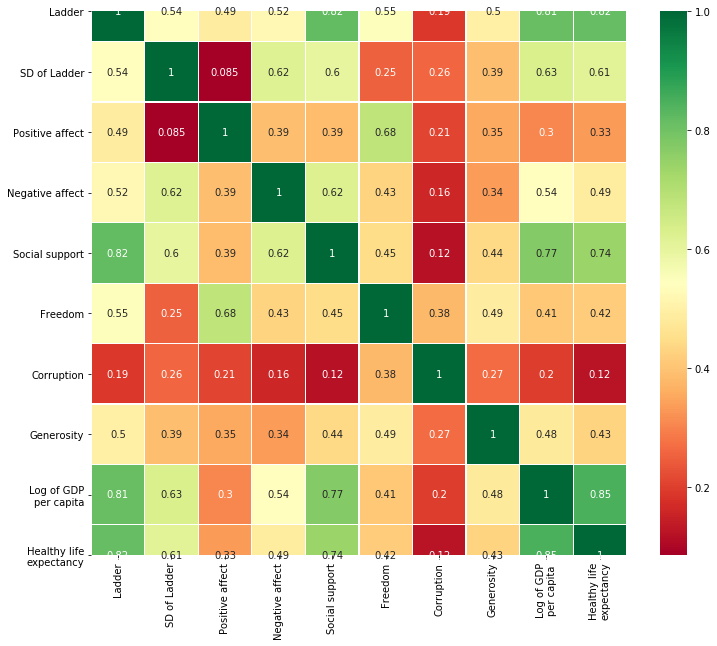

In [134]:
d = data.corr()
sns.heatmap(d,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)

In [190]:
d = data.corr()
names = set([x for x in d])
lim = 0.75
print(f'Порог коэфициента корреляции {lim} \n')
check = []
for x in d:
    for y in d.index:
        z = d.loc[y,x]
        if z > lim and y!=x and str(x)+str(y) not in check:
            print(f'Вероятно {x} прямо зависимо с {y} \n')
            check.append(str(x)+str(y))
            check.append(str(y)+str(x))
# print(check)

Порог коэфициента корреляции 0.75 

Вероятно Ladder прямо зависимо с Social support 

Вероятно Ladder прямо зависимо с Log of GDP
per capita 

Вероятно Ladder прямо зависимо с Healthy life
expectancy 

Вероятно Social support прямо зависимо с Log of GDP
per capita 

Вероятно Log of GDP
per capita прямо зависимо с Healthy life
expectancy 



# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [175]:
rs = np.random.RandomState(332)
c = rs.randint(1, 7, size=10)

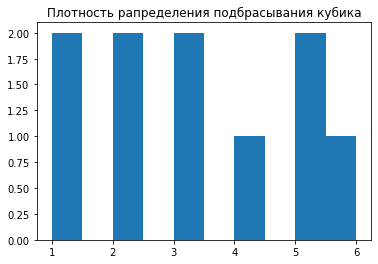

In [176]:
ax= plt.hist(c)
plt.title('Плотность рапределения подбрасывания кубика')
plt.show()

Это равномерное распределение



моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

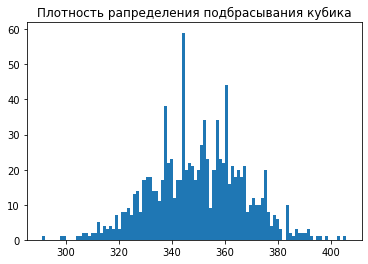

In [188]:
rs = np.random.RandomState(123)
c_sum = np.array([])
for k in range(1000):
    c1 = rs.randint(1, 7, size=100)
    c_sum = np.append(c_sum, c1.sum())
c_sum

ax= plt.hist(c_sum, bins=100)
plt.title('Плотность рапределения подбрасывания кубика')
plt.show()

Мы подбрасываем "честный" кубик поэтому величины независимы и при суммировании они будут образовывать нормальное распределение согласно ЦПТ, которую можно применять как раз по причине независимости и одинакового вклада величин.